In [15]:
import pandas as pd
mel = pd.read_csv("H:\Downloads\melb_house.csv", sep=",")
mel.head()


,suburb,rooms,type,price,method,seller_g,date,distance,postcode,bedroom2,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,2.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,3.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


checklist:
groupby
lambda
graphs (scatter, count, line)

In [16]:
mel.columns
mel=mel.fillna(0)

In [17]:
mel["price_in_millions"] = mel["price"]/1000000
column_index = mel.columns.get_loc("price")
mel.insert(column_index + 1, "price_in_millions", mel.pop("price_in_millions"))
mel.head()

,suburb,rooms,type,price,price_in_millions,method,seller_g,date,distance,postcode,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,0.0,0.000,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,126.0,0.0,0.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,1480000.0,1.480,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,1035000.0,1.035,S,Biggin,2016-02-04,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,0.0,0.000,VB,Rounds,2016-02-04,2.5,3067.0,...,1.0,0.0,0.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,1465000.0,1.465,SP,Biggin,2017-03-04,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


In [18]:
sub_type_price = mel.groupby(["region_name","rooms"])["price_in_millions"].mean().reset_index()
sub_type_price

,region_name,rooms,price_in_millions
0,0,2,0.767500
1,0,3,0.616000
2,Eastern Metropolitan,1,0.507905
3,Eastern Metropolitan,2,0.578473
4,Eastern Metropolitan,3,0.761885
...,...,...,...
67,Western Victoria,3,0.350431
68,Western Victoria,4,0.392870
69,Western Victoria,5,0.585000
70,Western Victoria,6,0.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Average price of different rooms for different regions')

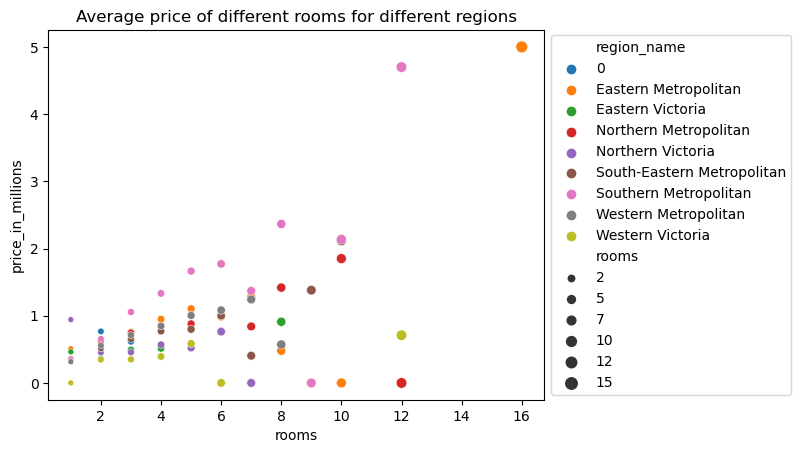

In [20]:
sns.scatterplot(x="rooms",y="price_in_millions",data=sub_type_price,size="rooms",hue="region_name")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Average price of different rooms for different regions")


In [21]:
mel[["bedroom2","bathroom","landsize"]]

,bedroom2,bathroom,landsize
0,2.0,1.0,126.0
1,2.0,1.0,202.0
2,2.0,1.0,156.0
3,3.0,2.0,0.0
4,3.0,2.0,134.0
...,...,...,...
34852,4.0,1.0,593.0
34853,2.0,2.0,98.0
34854,2.0,1.0,220.0
34855,0.0,0.0,0.0


In [22]:
pico = pd.pivot_table(mel, values=["price_in_millions","landsize"],index=["region_name","bedroom2"],aggfunc="mean",fill_value=0)
pico.reset_index()

,region_name,bedroom2,landsize,price_in_millions
0,0,0.0,0.000000,0.717000
1,Eastern Metropolitan,0.0,1.284103,0.760739
2,Eastern Metropolitan,1.0,278.277778,0.531389
3,Eastern Metropolitan,2.0,418.628947,0.596362
4,Eastern Metropolitan,3.0,523.003989,0.784160
...,...,...,...,...
72,Western Victoria,3.0,548.228571,0.357396
73,Western Victoria,4.0,620.807692,0.393558
74,Western Victoria,5.0,1130.000000,0.585000
75,Western Victoria,6.0,33000.000000,0.000000


Text(0.5, 1.0, 'Houses sold in each regions')

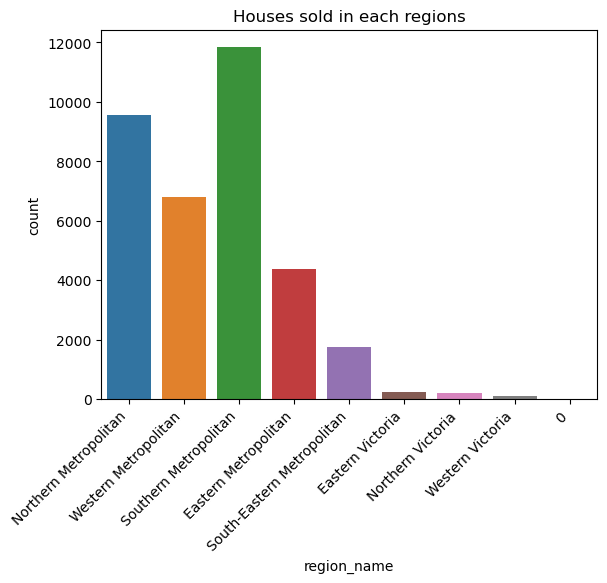

In [23]:
sns.countplot(x="region_name",data=mel)
plt.xticks(rotation=45, ha='right')
plt.title("Houses sold in each regions")

Index(['suburb', 'rooms', 'type', 'price', 'method', 'seller_g', 'date',
       'distance', 'postcode', 'bedroom2', 'bathroom', 'car', 'landsize',
       'building_area', 'year_built', 'council_area', 'latitude', 'longitude',
       'region_name', 'property_count', 'yr_qtr'],
      dtype='object')

In [24]:
mel["type_name"] = mel["type"].apply(lambda x: "house" if x == "h" else "unit/appartment" if x == "u" else "town house" if x == "t" else x)
column_index2 = mel.columns.get_loc("type")
mel.insert(column_index2 + 1, "type_name", mel.pop("type_name"))
mel.head()



,suburb,rooms,type,type_name,price,price_in_millions,method,seller_g,date,distance,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,house,0.0,0.000,SS,Jellis,2016-09-03,2.5,...,1.0,126.0,0.0,0.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,house,1480000.0,1.480,S,Biggin,2016-12-03,2.5,...,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,house,1035000.0,1.035,S,Biggin,2016-02-04,2.5,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,unit/appartment,0.0,0.000,VB,Rounds,2016-02-04,2.5,...,1.0,0.0,0.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,house,1465000.0,1.465,SP,Biggin,2017-03-04,2.5,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


In [25]:
mel["date"] = pd.to_datetime(mel["date"])



Text(0.5, 1.0, 'House prices fluctuation throughout years')

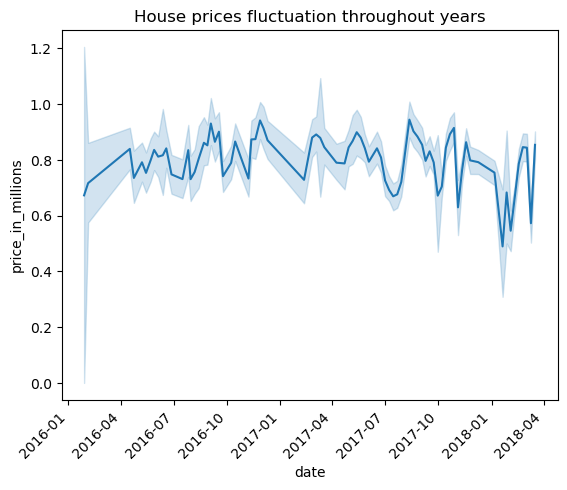

In [26]:
sns.lineplot(x="date",y="price_in_millions",data=mel)
plt.xticks(rotation=45, ha='right')
plt.title("House prices fluctuation throughout years")

<AxesSubplot:xlabel='type_name', ylabel='count'>

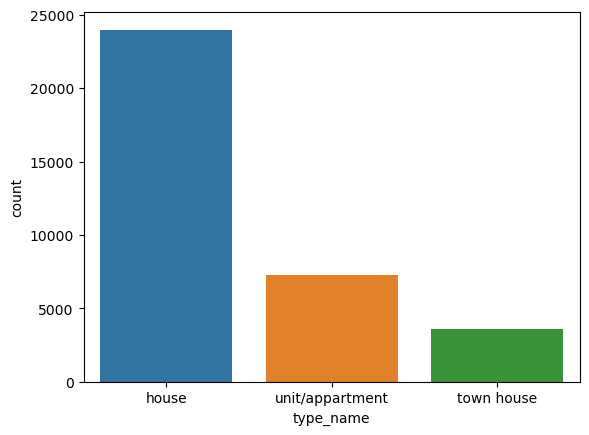

In [27]:
sns.countplot(x="type_name",data=mel)

In [28]:
1+1

2